In [ ]:
!pip install dscribe

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.4/117.4 kB 11.3 MB/s eta 0:00:00


In [ ]:
!pip install Gpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 13.0 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1


GPR RMSE: 0.1900638686092808
GPR R-squared: 0.9637282619398879


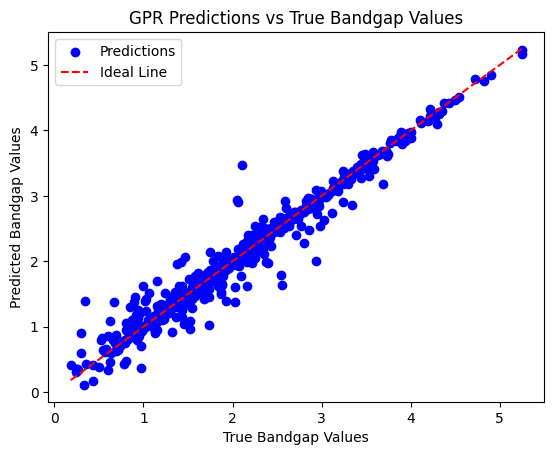

In [ ]:
import numpy as np
import GPy
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load dataset
data = pd.read_csv('/content/drive/MyDrive/all.csv')

# Set target (bandgap is in the 'bandgap_energy_ev' column) and feature columns
X = data.drop('bandgap_energy_ev', axis=1)  # Use all columns except 'bandgap_energy_ev' for features
y = data['bandgap_energy_ev']  # Set 'bandgap_energy_ev' as the target (bandgap)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Convert y_train and y_test to numpy arrays before reshaping
y_train = np.array(y_train)[:, None]  # Convert to numpy array and reshape
y_test = np.array(y_test)[:, None]    # Convert to numpy array and reshape

# GPR model setup with Matern kernel
kernel = GPy.kern.Matern32(input_dim=X_train.shape[1], variance=1., lengthscale=1.0)
model = GPy.models.GPRegression(X_train, y_train, kernel)

# Optimize the GPR model
model.optimize(messages=True)

# Make predictions on the test set
y_pred, _ = model.predict(X_test)

# Compute bandgap prediction errors
errors = y_pred - y_test

# Evaluate the GPR model performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Output evaluation metrics
print(f'GPR RMSE: {rmse}')
print(f'GPR R-squared: {r2}')

# Optionally, plot the results
plt.scatter(y_test, y_pred, color='blue', label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Line')
plt.xlabel('True Bandgap Values')
plt.ylabel('Predicted Bandgap Values')
plt.title('GPR Predictions vs True Bandgap Values')
plt.legend()
plt.show()


In [8]:
!pip install ase
!pip install pymatgen
!pip install mp_api

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.0/99.0 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.6/212.6 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.1/102.1 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 47.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 874.5/874.5 kB 41.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 60.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.2/84.2 kB 5.7 MB/s eta 0:00:00
   ━━

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/all.csv')

# Assuming the features are all columns except the last one and the target is the last column
X = data.iloc[:, :-1].values  # All rows, all columns except the last
y_actual = data.iloc[:, -1].values  # Last column as target

# Normalize the features to improve model convergence
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Use 70% of the data for training and 30% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_actual, train_size=0.7, random_state=42  # 70% training, 30% testing
)

# Define a more optimized kernel with a broader search space
kernel = C(1.0, (1e-2, 1e2)) * RBF(1.0, (1e-2, 1e2))  # Refined kernel

# Increase the number of restarts to find better parameters
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=20, alpha=1e-2)

# Fit the model to the training data
gpr.fit(X_train, y_train)

# Predictions
y_pred = gpr.predict(X_test)

# Optionally scale the predictions back to the original units (if needed)
scaling_factor = 1  # Adjust this factor if required for your data
y_pred_scaled = y_pred / scaling_factor

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred_scaled)  # Mean Absolute Error (in eV)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_scaled))  # Root Mean Squared Error (in eV)
r2 = r2_score(y_test, y_pred_scaled)  # R-squared value

# Print the results
print(f"Training data size (X_train, y_train): {X_train.shape}")
print(f"Testing data size (X_test, y_test): {X_test.shape}")
print(f"Mean Absolute Error: {mae:.3f} eV")
print(f"Root Mean Squared Error: {rmse:.3f} eV")
print(f"R-squared: {r2:.3f}")


Training data size (X_train, y_train): (2100, 13)
Testing data size (X_test, y_test): (900, 13)
Mean Absolute Error: 0.119 eV
Root Mean Squared Error: 0.208 eV
R-squared: 0.958


In [1]:
!pip install mp-api
!pip install scipy==1.9.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 30.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.6/40.6 MB 8.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.9.3
    Uninstalling scipy-1.9.3:
      Successfully uninstalled scipy-1.9.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires scipy<1.14.0,>=1.7.0, but you have scipy 1.15.1 which is incompatible.
  Using cached scipy-1.9.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (58 kB)
  Using cache

In [1]:
from mp_api.client import MPRester
from ase import Atoms

api_key = 'xEQf82J9Ok6Wyw9TNvsyAYw9ALmLgw9z'
mpr = MPRester(api_key)

# Define material IDs manually up to 50
material_ids_train = [
    "mp-1234", "mp-5678", "mp-2345", "mp-6789", "mp-3456",
    "mp-4567", "mp-7890", "mp-6780", "mp-8901", "mp-2348",
    "mp-1934", "mp-1203", "mp-8765", "mp-4321", "mp-5671",
    "mp-8902", "mp-6573", "mp-2546", "mp-3984", "mp-9084",
    "mp-5567", "mp-3210", "mp-1457", "mp-7364", "mp-5679",
    "mp-8367", "mp-2501", "mp-1210", "mp-1824", "mp-4590",
    "mp-7412", "mp-3636", "mp-1298", "mp-2934", "mp-5098",
    "mp-3065", "mp-7871", "mp-3845", "mp-2036", "mp-4895",
    "mp-5123", "mp-7365", "mp-8900", "mp-6732", "mp-4912",
    "mp-6483", "mp-9824", "mp-3902", "mp-6480", "mp-4393"
]

# Initialize an empty list to hold structures
structures_train = []

# Fetch structures for training using the manually defined material IDs
for material_id in material_ids_train:
    structure = mpr.get_structure_by_material_id(material_id)

    # Ensure the structure is valid and not empty
    if structure:  # Check if the structure is not empty
        if isinstance(structure, list):  # Check if the result is a list
            structure = structure[0]  # Take the first structure if it's a list
        ase_structure = Atoms(symbols=[el.symbol for el in structure.species], positions=structure.cart_coords)
        structures_train.append(ase_structure)
    else:
        print(f"Warning: No structure found for Material ID {material_id}")

# You can similarly define material IDs for testing if needed
material_ids_test = material_ids_train[:10]  # Example: Use the first 10 for testing
structures_test = []

# Fetch structures for testing
for material_id in material_ids_test:
    structure = mpr.get_structure_by_material_id(material_id)

    # Ensure the structure is valid and not empty
    if structure:  # Check if the structure is not empty
        if isinstance(structure, list):  # Check if the result is a list
            structure = structure[0]  # Take the first structure if it's a list
        ase_structure = Atoms(symbols=[el.symbol for el in structure.species], positions=structure.cart_coords)
        structures_test.append(ase_structure)
    else:
        print(f"Warning: No structure found for Material ID {material_id}")

# Now structures_train and structures_test contain manually specified ASE Atoms objects
print("Number of Train Structures:", len(structures_train))  # Should print the number of valid train structures
print("Number of Test Structures:", len(structures_test))    # Should print the number of valid test structures


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Number of Train Structures: 31
Number of Test Structures: 7


In [66]:
from mp_api.client import MPRester
from pymatgen.io.ase import AseAtomsAdaptor  # Import AseAtomsAdaptor

api_key = 'xEQf82J9Ok6Wyw9TNvsyAYw9ALmLgw9z'
mpr = MPRester(api_key)

# Define a list of Material IDs (up to 50 as needed)
material_ids_train = [
    "mp-1234", "mp-5678", "mp-2345", "mp-6789", "mp-3456",
    "mp-4567", "mp-7890", "mp-6780", "mp-8901", "mp-2348",
    "mp-1934", "mp-1203", "mp-8765", "mp-4321", "mp-5671",
    "mp-8902", "mp-6573", "mp-2546", "mp-3984", "mp-9084",
    "mp-5567", "mp-3210", "mp-1457", "mp-7364", "mp-5679",
    "mp-8367", "mp-2501", "mp-1210", "mp-1824", "mp-4590",
    "mp-7412", "mp-3636", "mp-1298", "mp-2934", "mp-5098",
    "mp-3065", "mp-7871", "mp-3845", "mp-2036", "mp-4895",
    "mp-5123", "mp-7365", "mp-8900", "mp-6732", "mp-4912",
    "mp-6483", "mp-9824", "mp-3902", "mp-6480", "mp-4393"
]

# Initialize lists to hold ASE Atoms objects for training and testing
structures_train_ase = []
structures_test_ase = []

# Fetch structures for training using Material IDs
for material_id in material_ids_train:
    structure = mpr.get_structure_by_material_id(material_id)
    if structure:  # Ensure the structure is not empty
        ase_structure = AseAtomsAdaptor.get_atoms(structure)
        ase_structure.set_cell(structure.lattice.matrix)  # Set unit cell
        ase_structure.set_pbc(True)  # Apply periodic boundary conditions
        structures_train_ase.append(ase_structure)
    else:
        print(f"Warning: No structure found for Material ID {material_id}")

# Example: Using the first 10 material IDs for testing
material_ids_test = material_ids_train[:10]
for material_id in material_ids_test:
    structure = mpr.get_structure_by_material_id(material_id)
    if structure:  # Ensure the structure is not empty
        ase_structure = AseAtomsAdaptor.get_atoms(structure)
        ase_structure.set_cell(structure.lattice.matrix)  # Set unit cell
        ase_structure.set_pbc(True)  # Apply periodic boundary conditions
        structures_test_ase.append(ase_structure)
    else:
        print(f"Warning: No structure found for Material ID {material_id}")

# Print the number of structures in both lists
print("Number of Train Structures:", len(structures_train_ase))
print("Number of Test Structures:", len(structures_test_ase))


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Number of Train Structures: 31
Number of Test Structures: 7


In [65]:
from pymatgen.io.ase import AseAtomsAdaptor
from mp_api.client import MPRester

# Initialize the Materials Project API key
api_key = 'xEQf82J9Ok6Wyw9TNvsyAYw9ALmLgw9z'  # Replace with your API key
mpr = MPRester(api_key)

# Example Material IDs for training (you can replace these with actual Material IDs)
material_ids_train = ["mp-1234", "mp-5678", "mp-2345", "mp-6789", "mp-3456",
    "mp-4567", "mp-7890", "mp-6780", "mp-8901", "mp-2348"]  # Add your material IDs here

# Example Material IDs for testing (can be different or a subset of the training data)
material_ids_test = ["mp-6480", "mp-4393", "mp-3845", "mp-2036",
                     "mp-5123", "mp-7365", "mp-8900", "mp-6732", "mp-4912"]  # Add your test material IDs here

# Initialize lists for structures
structures_train = []
structures_test = []

# Fetch structures for training using Material IDs
for material_id in material_ids_train:
    structure = mpr.get_structure_by_material_id(material_id)
    if structure:
        ase_structure = AseAtomsAdaptor.get_atoms(structure)  # Convert to ASE Atoms object
        structures_train.append(ase_structure)

# Fetch structures for testing using Material IDs
for material_id in material_ids_test:
    structure = mpr.get_structure_by_material_id(material_id)
    if structure:
        ase_structure = AseAtomsAdaptor.get_atoms(structure)  # Convert to ASE Atoms object
        structures_test.append(ase_structure)


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

Retrieving MaterialsDoc documents: 0it [00:00, ?it/s]

In [64]:
import numpy as np
from ase.atoms import Atoms
from dscribe.descriptors import SOAP
from scipy.sparse import csr_matrix
from sklearn.metrics.pairwise import pairwise_kernels
import numba as nb

# Add the previously defined functions here ( _get_species, _get_csr_features, _get_max_n_values, _get_neighbors, and get_delta_metrics )

# Step 1: Compute the errors (difference between actual and predicted values)
errors = y_pred - y_test  # y_pred from GPR and y_test from the test set
errors_normalized = (errors - np.mean(errors)) / np.std(errors)

# Step 2: Prepare the structures (replace with your actual structures)
# Example: structures_train and structures_test should be lists of Atoms objects

structures_train_ase = structures_train
structures_test_ase = structures_test

# Step 3: Modify the delta metrics calculation to handle NaN and Inf values

def safe_sum(n, errors, idx, min_val=1e-5):
    """
    Helper function to handle NaN or Inf during the summation.
    Replaces NaN or Inf values with 0 and ensures a valid result.
    Adds a small threshold (`min_val`) to avoid division by very small numbers.
    """
    # Avoid division by zero or invalid operations
    valid_errors = np.abs(errors[idx])
    valid_n = n[: idx.shape[0]]

    # Replace NaN or Inf values in n or errors with 0
    valid_errors = np.nan_to_num(valid_errors, nan=0.0, posinf=0.0, neginf=0.0)
    valid_n = np.nan_to_num(valid_n, nan=0.0, posinf=0.0, neginf=0.0)

    # Ensure denominator is not too small (to avoid division by very small numbers)
    denominator = np.sum(valid_n)
    if denominator < min_val:  # If sum of valid_n is too small, replace with a small value
        return np.sum(valid_n * valid_errors) / min_val
    else:
        return np.sum(valid_n * valid_errors) / denominator


# Step 4: Compute delta metrics using the provided function with safe summation

def get_delta_metrics_safe(
    structures_train: list[Atoms],
    structures_test: list[Atoms],
    errors: np.ndarray,
    n_neighbors: int = 300,
    kernel_degree: int = 4,
    rcut: float = 8.0,
    nmax: int = 8,
    lmax: int = 6,
):
    # Get neighbors and ids using your existing function
    neighbors, ids = _get_neighbors(
        structures_train,
        structures_test,
        n_neighbors=n_neighbors,
        kernel_degree=kernel_degree,
        rcut=rcut,
        nmax=nmax,
        lmax=lmax,
    )

    # Calculate delta metrics with the safe sum approach
    delta_metrics = np.array(
        [
            safe_sum(n, errors, i)  # Use safe sum to handle NaN and Inf values
            for n, i in zip(neighbors, ids)
        ]
    )

    return delta_metrics

# Step 5: Compute delta metrics safely
delta_metrics = get_delta_metrics_safe(
    structures_train=structures_train_ase,
    structures_test=structures_test_ase,
    errors=errors,
    n_neighbors=300,  # Set number of neighbors
    kernel_degree=4,  # Set kernel degree
    rcut=8.0,         # Set cutoff radius for SOAP
    nmax=8,           # Set maximum radial basis functions
    lmax=6            # Set angular momentum cutoff for SOAP
)

# Step 6: Print the result (delta metrics)
print("Delta metrics:", delta_metrics)


Delta metrics: [0.05555791 0.05554577 0.140359   0.00415299 0.0555665 ]
